In [2]:
import qtm.qcompilation
import numpy as np
import types
import qiskit
%load_ext autoreload
%autoreload 2

In [ ]:
num_qubits = 3
num_layers = 1

thetas = np.ones((2*num_qubits)*num_layers)
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_polygongraph_ansatz,
    vdagger = qtm.state.create_AME_state_fake(num_qubits).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)
compiler.fit(num_steps = 100, verbose = 1)

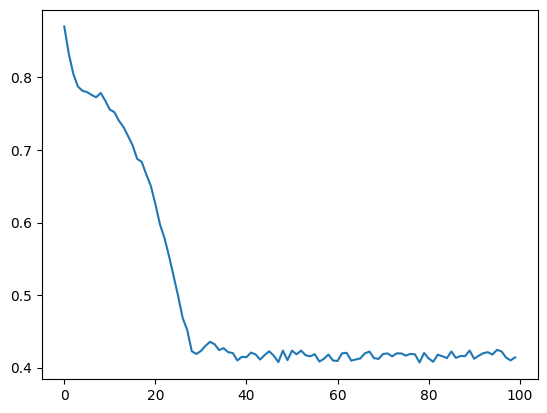

In [20]:
import matplotlib.pyplot as plt
plt.plot(compiler.loss_values)

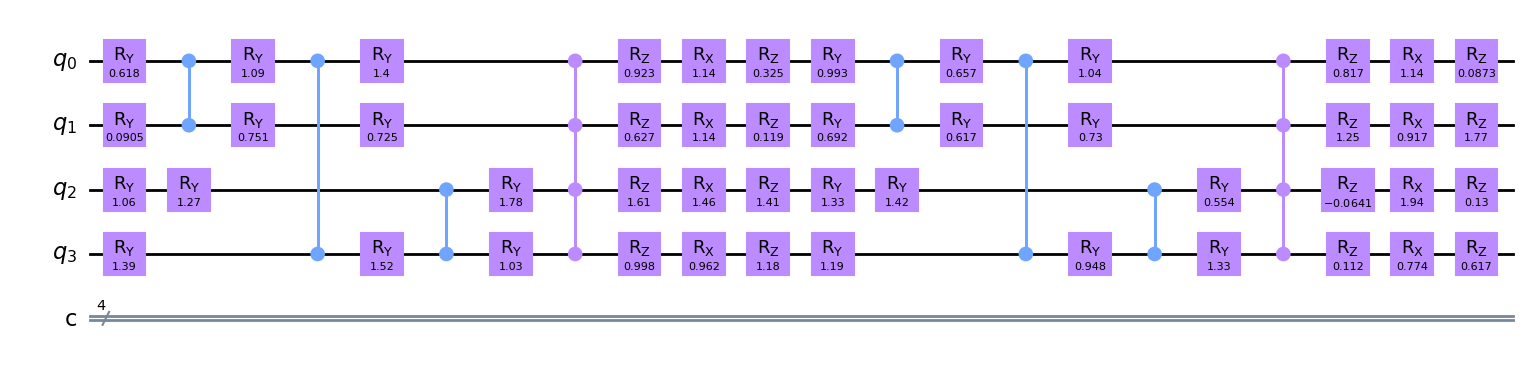

In [39]:
qtm.ansatz.create_hypergraph_layered_ansatz(qiskit.QuantumCircuit(4,4), thetas, 2).draw('mpl')

In [3]:
for i in range(2, 10):
    qc = qtm.state.create_haar_state(i)
    result = qiskit.transpile(qc, backend=qtm.constant.backend, optimization_level=3)
    print(result.depth())

1
1
1
1
1
1
1
1


In [19]:
for num_qubits in [2, 3,4,5,6]:
    psi = 2*np.random.rand(2**num_qubits)-1
    psi = psi / np.linalg.norm(psi)
    encoder = qtm.encoding.Encoding(psi, 'amplitude_encoding')
    qc = encoder.qcircuit
    (qc.draw('mpl'))
    print(qc.depth())

5
26
130
594
2546


In [30]:
import qtm.qcompilation
import numpy as np
import types, qiskit
num_qubits = 3
num_layers = 2

for optimizer in ['adam']:
    thetas = np.ones((6*num_qubits)*num_layers)
    compiler = qtm.qcompilation.QuantumCompilation(
        u = qtm.ansatz.create_hypergraph_layered_ansatz,
        vdagger = qtm.state.create_AME_state(num_qubits).inverse(),
        optimizer = optimizer,
        loss_func = 'loss_fubini_study',
        thetas = thetas,
        is_evolutional=False,
        num_layers = num_layers
    )
    compiler.fit(num_steps = 100, verbose = 1)
    #compiler.save("", text = "", path = f"../experiments/polygon_graph_ghz_{num_layers}_layer_{optimizer}_scheduler/3/", save_all = True)
    

Step:   0%|          | 0/100 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
Step: 100%|██████████| 100/100 [05:29<00:00,  3.29s/it]


In [31]:
compiler.save("", text = "", path = f"../experiments/hyper_graph_layered_ame_{num_layers}_layer_{optimizer}/{num_qubits}/", save_all = True)
   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


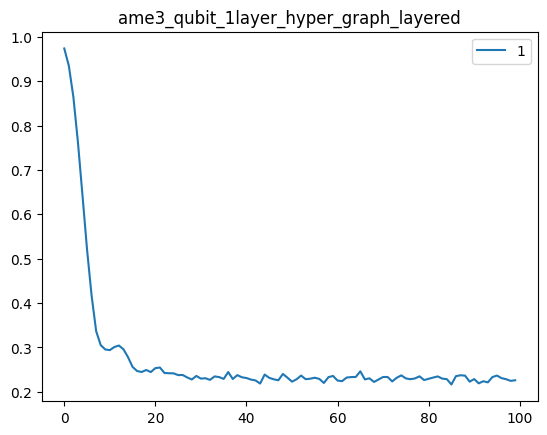

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

ansatz = "hyper_graph_layered"
for layer in [1]:
    for optimizer in ['adam']:
        loss = pd.read_csv(f"../experiments/{ansatz}_ame_{layer}_layer_{optimizer}/3/loss_values.csv", sep=",", header=None)
        #loss = loss.applymap(lambda s: complex(s.replace('i', 'j'))).values
        plt.plot(loss, label = layer)
plt.title(f"ame3_qubit_1layer_{ansatz}")
plt.legend()
plt.savefig(f"ame3_qubit_1layer_{ansatz}_loss.eps", format = "eps", dpi = 1000)

In [43]:
np.min(compiler.loss_values)

0.033166247903553846

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


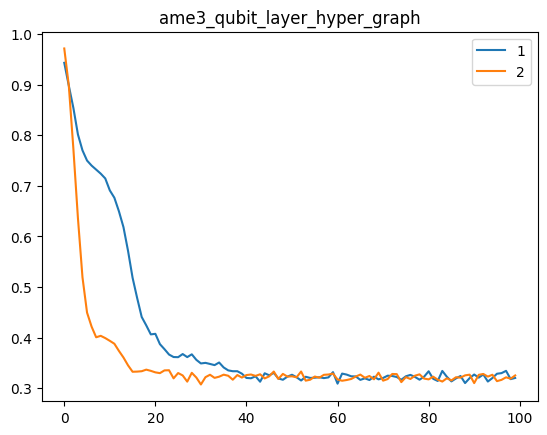

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

ansatz = "hyper_graph"
for layer in [1,2]:
    for optimizer in ['adam']:
        loss = pd.read_csv(f"../experiments/{ansatz}_ame_{layer}_layer_{optimizer}/3/loss_values.csv", sep=",", header=None)
        #loss = loss.applymap(lambda s: complex(s.replace('i', 'j'))).values
        plt.plot(loss, label = layer)
plt.title(f"ame3_qubit_layer_{ansatz}")
plt.legend()
plt.savefig(f"ame3_qubit_layer_{ansatz}_loss.eps", format = "eps", dpi = 1000)

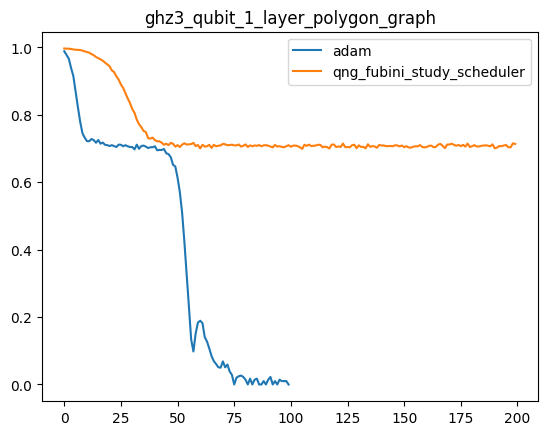

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ansatz = "polygon_graph"
for optimizer in ['adam', 'qng_fubini_study_scheduler']:
    loss = pd.read_csv(f"../experiments/{ansatz}_ghz_1_layer_{optimizer}/3/loss_values.csv", sep=",", header=None)
    #loss = loss.applymap(lambda s: complex(s.replace('i', 'j'))).values
    plt.plot(loss, label = optimizer)
plt.title(f"ghz3_qubit_1_layer_{ansatz}")
plt.legend()
#plt.savefig(f"ghz3_qubit_1_layer_{ansatz}_loss.eps", format = "eps", dpi = 1000)